In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
dat_train = pd.read_csv('train.csv')
dat_test = pd.read_csv('test.csv')

print(dat_train.describe())
print(dat_train.info())

               version https://git-lfs.github.com/spec/v1
count                                                   2
unique                                                  2
top     oid sha256:2bd6bd083cdfb9194dce39e521c4bbf4ca7...
freq                                                    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   version https://git-lfs.github.com/spec/v1  2 non-null      object
dtypes: object(1)
memory usage: 148.0+ bytes
None


In [3]:
dat_train['Vehicle_Age'].replace({'1-2 Year' : 1 , '> 2 Years' : 2, '< 1 Year' : 0}, inplace = True)
dat_train['Vehicle_Damage'].replace({ 'Yes' : 1 , 'No' : 0}, inplace = True)
dat_train['Gender'].replace({ 'Male' : 1, 'Female' : 0 } , inplace = True)

dat_test['Vehicle_Age'].replace({'1-2 Year' : 1 , '> 2 Years' : 2, '< 1 Year' : 0}, inplace = True)
dat_test['Vehicle_Damage'].replace({ 'Yes' : 1 , 'No' : 0}, inplace = True)
dat_test['Gender'].replace({ 'Male' : 1, 'Female' : 0 } , inplace = True)

KeyError: 'Vehicle_Age'

In [ ]:
X = dat_train.drop(columns=['id', 'Response'])
y = dat_train['Response']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
xgb = XGBClassifier(objective='binary:logistic' , n_jobs = 6)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print(pred)
print(roc_auc_score(y_test, pred))
#plt.plot(fpr, tpr)


[0 0 0 ... 0 0 0]
0.539343355834013


Response
0    10089739
1     1415059
Name: count, dtype: int64


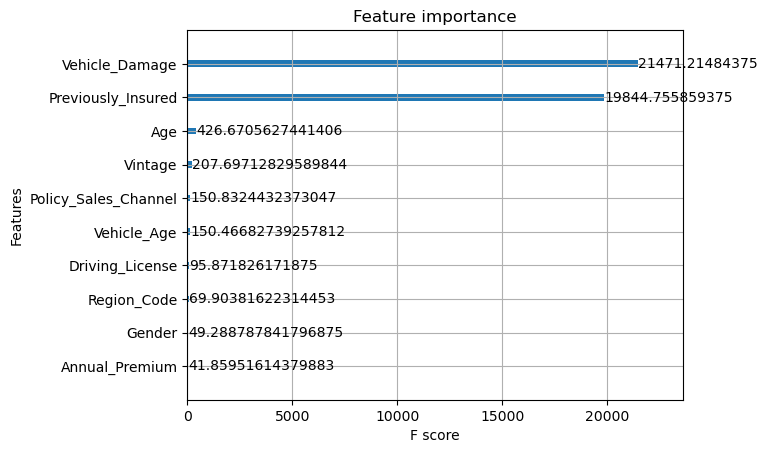

In [ ]:

test = pd.DataFrame({'res': pred})
print(y.value_counts())
plot_importance(xgb , importance_type = 'gain')
plt.show()
